# Data Manipulation and Data Visualization on a Cancer Dataset
by Jose Murguia


In this project, we are analyzing a dataset on cancer. It is crucial to pose relevant questions that address your inquiries about the dataset. One question that can be asked, is whether the size of the tumor determines its malignancy. After asking questions, we can move on the the next step. When handling dataframes, it's important to carefully examine and rectify any potential issues that might arise, such as incorrect data types, missing data, or duplicates. In this project, I addressed missing values and duplicate entries using the Cancer Data Means dataset (cancer_data_means.csv). Additionally, I employed plots to illustrate relationships within the data.

#### In this first step, I imported pandas and loaded the cancer data. I checked which columns had missing values.

In [13]:
# I imported pandas
import pandas as pd

# I loaded the cancer data
df = pd.read_csv('cancer_data_means.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [14]:
# checked which columns had missing values with info()
# As we can see, this dataset contains missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            548 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         521 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave_points_mean     569 non-null    float64
 10  symmetry_mean           504 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.5+ KB


#### Next, I used means to fill in the missing values but only on the numberic columns. I then confirmed no missing values.

In [15]:
# I used means to fill in missing values
# I calculated mean only on numeric columns
# by using .mean(numeric_only=True)

df.fillna(df.mean(numeric_only=True), inplace=True)

# I confirmed correction with info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave_points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.5+ KB


#### Here, I checked for any duplicates in the data and dropped the duplicates. I then confirmed correction by checking for duplicates.

In [16]:
# checked for duplicates in the data

df.duplicated()
sum(df.duplicated())

5

In [17]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [18]:
# confirm correction by rechecking for duplicates in the data
sum(df.duplicated())

0

## Renaming Columns

 Every column except for `id` and `diagnosis` has `_mean` at the end. Since we know that these are all means, this extra string seems unnecessary. I renamed all columns to remove `_mean` from the end where applicable.

In [19]:
# remove "_mean" from column names
new_labels = []
for col in df.columns:
    if '_mean' in col:
        new_labels.append(col[:-5])  # exclude last 5 characters
    else:
        new_labels.append(col)

# new labels for our columns
new_labels

['id',
 'diagnosis',
 'radius',
 'texture',
 'perimeter',
 'area',
 'smoothness',
 'compactness',
 'concavity',
 'concave_points',
 'symmetry',
 'fractal_dimension']

#### In this section I assigned new labels to columns.

In [20]:
# assign new labels to columns in dataframe
df.columns = new_labels

# display first few rows of dataframe to confirm changes
df.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,842302,M,17.99,19.293431,122.80,1001.0,0.118400,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.770000,132.90,1326.0,0.084740,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.250000,130.00,1203.0,0.109600,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.380000,77.58,386.1,0.096087,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.340000,135.10,1297.0,0.100300,0.13280,0.1980,0.10430,0.1809,0.05883


In [21]:
# I save an edited copy so we can have the orginal data set as well
df.to_csv('cancer_data_edited.csv', index=False)

In [23]:
# confirmed the changes made to the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 568
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 564 non-null    int64  
 1   diagnosis          564 non-null    object 
 2   radius             564 non-null    float64
 3   texture            564 non-null    float64
 4   perimeter          564 non-null    float64
 5   area               564 non-null    float64
 6   smoothness         564 non-null    float64
 7   compactness        564 non-null    float64
 8   concavity          564 non-null    float64
 9   concave_points     564 non-null    float64
 10  symmetry           564 non-null    float64
 11  fractal_dimension  564 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 57.3+ KB


# Data Visualization
### In this section, I employed multiple plots to illustrate various relationships within the data

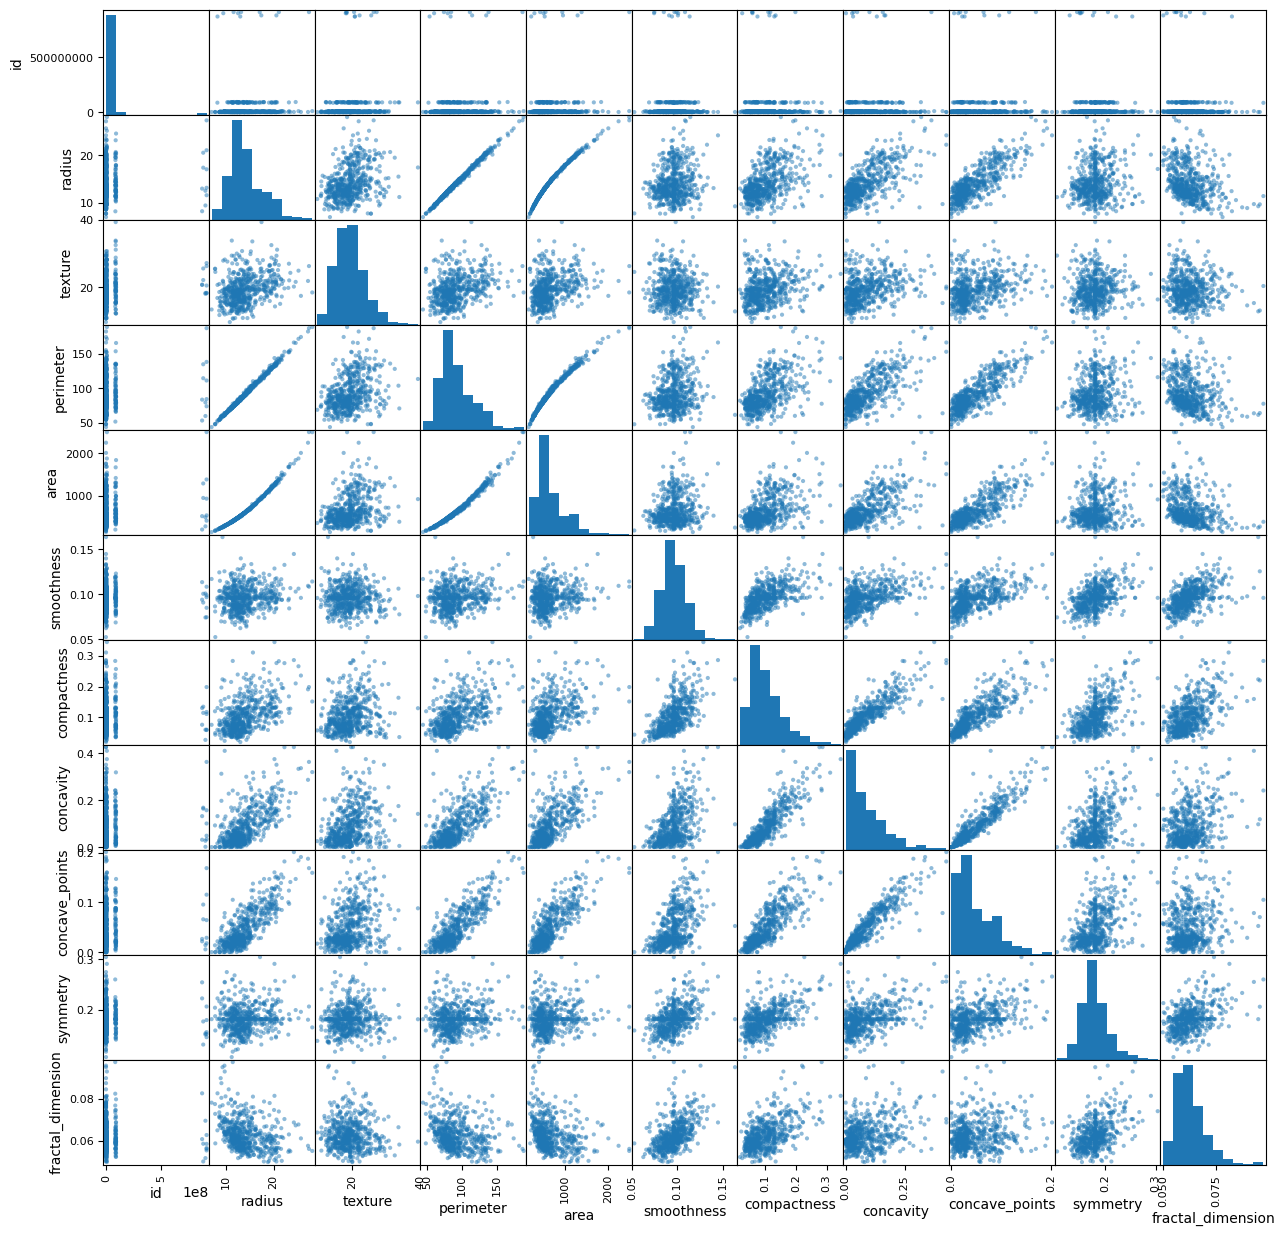

In [25]:
# Scatter plot of all columns
pd.plotting.scatter_matrix(df, figsize=(15, 15));

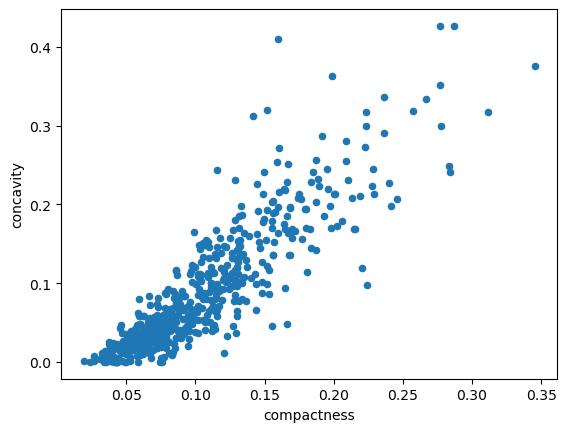

In [26]:
# Scatter plot of two columns, compactness and concavity
df.plot(x='compactness', y='concavity', kind='scatter');

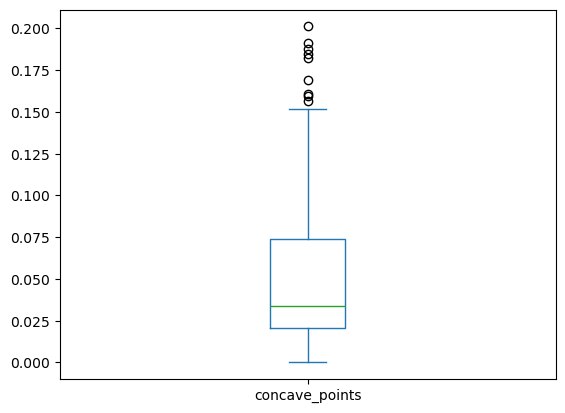

In [27]:
### Box plot of concave_points
df['concave_points'].plot(kind='box');

# Data Visualization and Drawing Conclusions
I used descriptive statistics to answer some questions from the `cancer_data_edited.csv` dataset.  
We return back to our question. Does the size of a tumor affect it's malignancy? We'll create a layered histogram to better understand the differences between malignant and benign diagnosis.

In [28]:
#Imported matplotlib.pyplot

import matplotlib.pyplot as plt

In [29]:
# load the dataset 
df = pd.read_csv('cancer_data_edited.csv')
df.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,842302,M,17.99,19.293431,122.80,1001.0,0.118400,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.770000,132.90,1326.0,0.084740,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.250000,130.00,1203.0,0.109600,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.380000,77.58,386.1,0.096087,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.340000,135.10,1297.0,0.100300,0.13280,0.1980,0.10430,0.1809,0.05883


### Filtered the data for malignant diagnosis

In [30]:
# Example of using a mask to filter our data
mask = df['diagnosis'] == 'M'
print(mask)

0       True
1       True
2       True
3       True
4       True
       ...  
559     True
560     True
561     True
562     True
563    False
Name: diagnosis, Length: 564, dtype: bool


### I created a sub dataset for filtered malignant diagnosis

In [31]:
# Creating a sub dataset for malignant diagnosis
df_m = df[df['diagnosis'] == 'M']
df_m.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,842302,M,17.99,19.293431,122.80,1001.0,0.118400,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.770000,132.90,1326.0,0.084740,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.250000,130.00,1203.0,0.109600,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.380000,77.58,386.1,0.096087,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.340000,135.10,1297.0,0.100300,0.13280,0.1980,0.10430,0.1809,0.05883


#### Ran summary statistics for the area in the malignant diagnosis

In [32]:
# Summary statistics, take a look at the mean
df_m['area'].describe()

count     210.000000
mean      976.582857
std       365.494289
min       361.600000
25%       706.850000
50%       932.000000
75%      1200.750000
max      2501.000000
Name: area, dtype: float64

#### I created a sub dataset for the benign diagnosis and ran the same summary statistics

In [33]:
# Creating a sub dataset for benign diagnosis
df_b = df[df['diagnosis'] == 'B']
# Create the same summary stats
df_b['area'].describe()

count    354.000000
mean     462.712429
std      134.769158
min      143.500000
25%      374.975000
50%      458.150000
75%      551.550000
max      992.100000
Name: area, dtype: float64

#### Finally, a histogram plot showing the distributions of benign and malignant tumor areas. This visual suggests that there is a difference between the distributions of areas for benign and malignant tumors. We can observe from summary statistics and these histograms that malignant tumors are generally larger in size than benign tumors

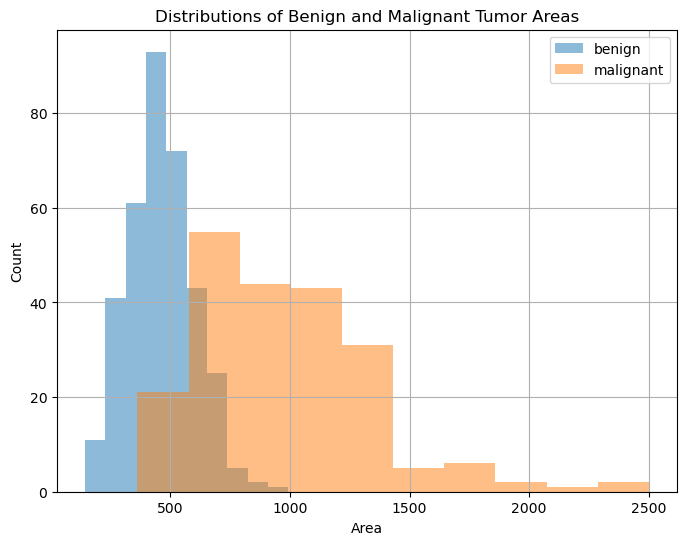

In [34]:
# Created a histogram plot
# .hist() returns a matplotlib subplot
# alpha changes it's transparency
# figsize changes the figure size
ax = df_b['area'].hist(alpha=0.5, figsize=(8, 6), label='benign');
# Layer a new histogram using the same subplot that was returned as 'ax'
df_m['area'].hist(alpha=0.5, figsize=(8, 6), label='malignant', ax=ax);
# Labeled the subplot with titles and a legend
ax.set_title('Distributions of Benign and Malignant Tumor Areas')
ax.set_xlabel('Area');
ax.set_ylabel('Count');
ax.legend(loc='upper right');